In [4]:
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
import numpy as np

import pykrige.kriging_tools as kt
import geopandas as gpd
import contextily as cx

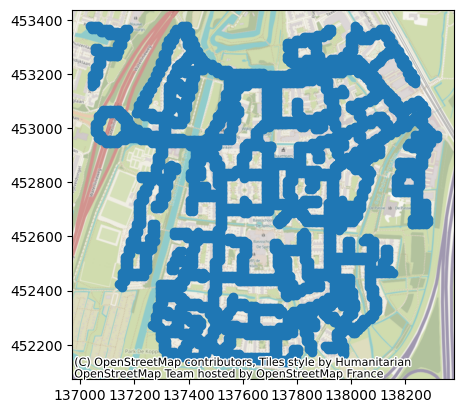

In [5]:
gdf = gpd.read_file('..\\output\\model_in1.GEOJSON', engine='pyogrio')
c_variables = ['x', 'y']
# x_variables = ['maxspeed', 'bridge', 'rt_tertiary', 'rt_residential', 'rt_living_street', 'rt_service']
x_variables = ['maxspeed', 'bridge']
y_variable = ['dBA_reg']
ax = gdf.plot()
cx.add_basemap(ax, crs=gdf.crs)


In [6]:
x = gdf[gdf['dBA_reg'].notna()]['x'].values
y = gdf[gdf['dBA_reg'].notna()]['y'].values
z = gdf[gdf['dBA_reg'].notna()]['dBA_reg'].values
OK = OrdinaryKriging(x,y,z)

In [10]:
gridx = gdf['x'].values
gridy = gdf['y'].values
z, ss = OK.execute("points", gridx, gridy)

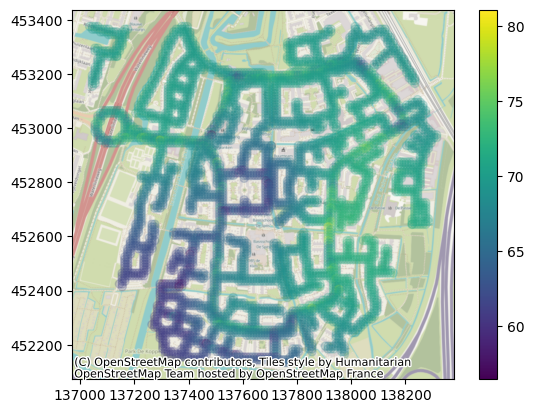

In [19]:
gdf['predy'] = z.data
ax = gdf.plot(column='predy', alpha=0.2, legend=True)
cx.add_basemap(ax, crs=gdf.crs)

TypeError: Invalid shape (4130,) for image data

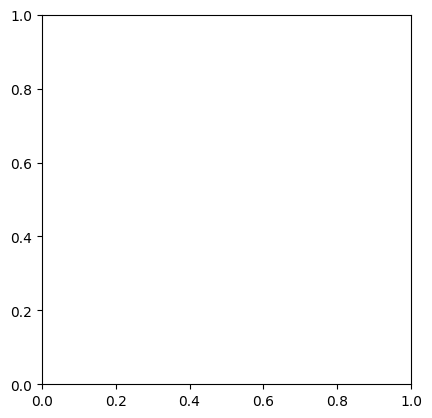

In [11]:
plt.imshow(z)
plt.show()